<a href="https://colab.research.google.com/github/SYJOO99/Public_Big_Data/blob/main/PCA%2BCLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA - 8차원을 2차원으로 차원 축소**

In [11]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [144]:
from google.colab import files
uploaded = files.upload()

Saving 8요소_도메인값.csv to 8요소_도메인값 (3).csv


In [145]:
import io
df = pd.read_csv(io.BytesIO(uploaded['8요소_도메인값.csv']))

In [146]:
data = pd.DataFrame(df)
data

,건강,경제,교육,사회적관계,안전,여가,환경
0,0.158128,0.187104,0.497440,0.428316,0.456704,0.39878,0.629641
1,0.219313,0.204024,0.637720,0.563616,0.342464,0.37226,0.696801
2,0.344244,0.343644,0.736140,0.521416,0.504244,0.65778,0.568541
3,0.484953,0.363524,0.707900,0.519696,0.531664,0.62534,0.600581
4,0.483732,0.438164,0.610860,0.464976,0.483444,0.62122,0.533241
5,0.371692,0.429224,0.577880,0.558496,0.455044,0.69370,0.663721
6,0.542197,0.518104,0.710500,0.519456,0.466304,0.73044,0.505441
7,0.522745,0.498644,0.591640,0.493076,0.529964,0.66860,0.538941
8,0.513246,0.585804,0.743960,0.578256,0.439084,0.69318,0.419041
9,0.433612,0.511064,0.611120,0.386496,0.566844,0.63872,0.507401


In [147]:
X = np.empty((229, 7))

In [148]:
X[:,0] = df['건강']
X[:,1] = df['경제']
X[:,2] = df['교육']
X[:,3] = df['사회적관계']
X[:,4] = df['안전']
X[:,5] = df['여가']
X[:,6] = df['환경']

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(data)
data_scaled = pd.DataFrame(result, columns=df.columns)
data_scaled.describe()

,건강,경제,교육,사회적관계,안전,여가,환경
count,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.290000e+02
mean,7.805498e-17,1.551403e-17,2.501638e-16,4.460285e-17,6.544983e-18,5.837155e-16,-2.241051e-16
std,1.002191e+00,1.002191e+00,1.002191e+00,1.002191e+00,1.002191e+00,1.002191e+00,1.002191e+00
min,-3.148601e+00,-2.167167e+00,-2.160668e+00,-2.254972e+00,-2.610757e+00,-2.333854e+00,-2.156460e+00
25%,-7.127346e-01,-6.989726e-01,-7.880905e-01,-6.835600e-01,-6.276109e-01,-8.288525e-01,-7.806571e-01
50%,2.193552e-02,-7.536931e-02,6.110121e-03,5.640647e-02,-2.957312e-03,5.426765e-02,-2.442010e-02
75%,6.826540e-01,6.799176e-01,8.982997e-01,7.253386e-01,7.087831e-01,8.071203e-01,7.178664e-01
max,2.235411e+00,2.543001e+00,1.810881e+00,2.730122e+00,2.144587e+00,1.991147e+00,2.962940e+00


In [150]:
pca = PCA(n_components=3)
result = pca.fit(X)

In [151]:
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y", "z"])
result

,x,y,z
0,-0.975254,-0.277343,2.015730
1,0.862576,-0.270488,3.210145
2,0.105251,0.822954,1.699346
3,-0.026843,0.063232,1.327696
4,-0.276204,0.494184,0.522317
5,-0.512990,0.688176,1.859676
6,0.423228,1.164896,0.534550
7,-0.547376,0.550871,0.195385
8,1.302286,1.743256,0.120159
9,-0.954328,1.113426,-0.190729


---
## **시각화**

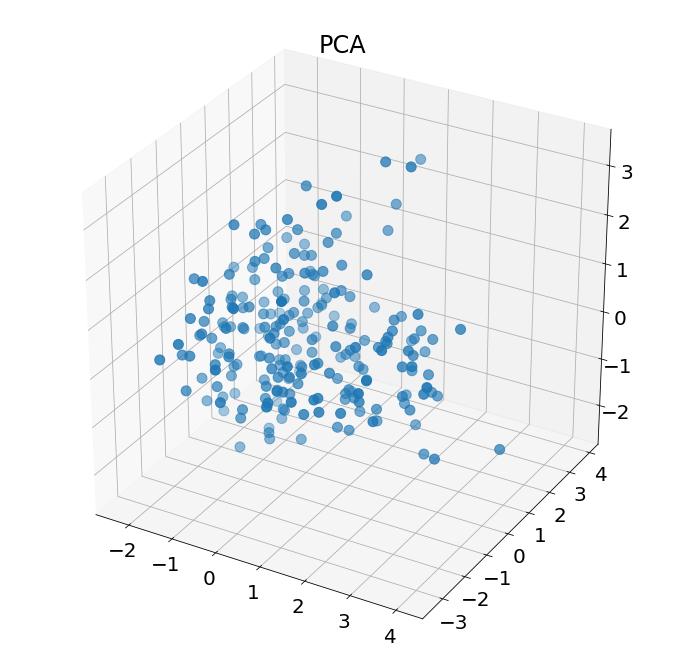

In [152]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화

plt.rcParams["figure.figsize"] = (12, 12)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['x'], result['y'], result['z'], s=100)
plt.title('PCA')
plt.show()



---
# **OPTIMIZE K**


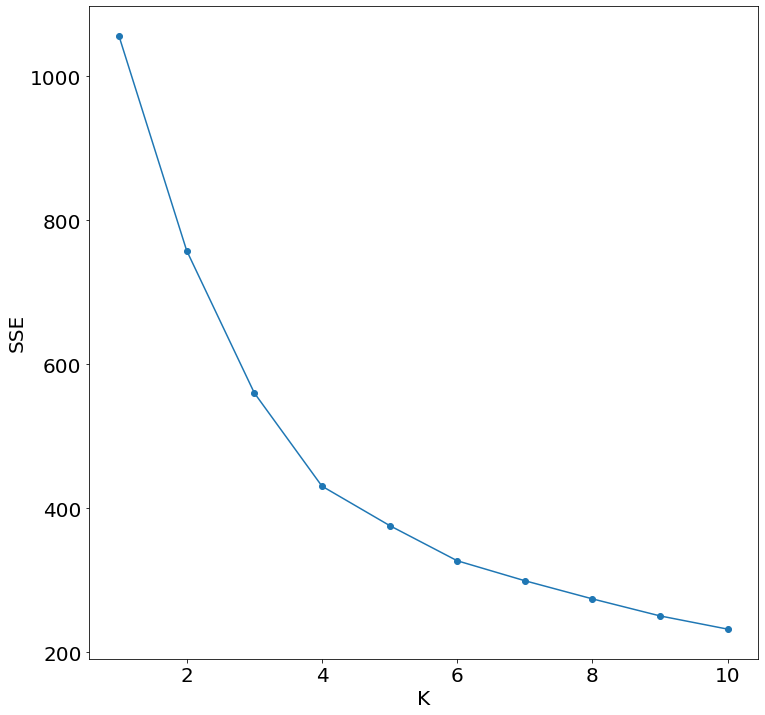

In [153]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(result)

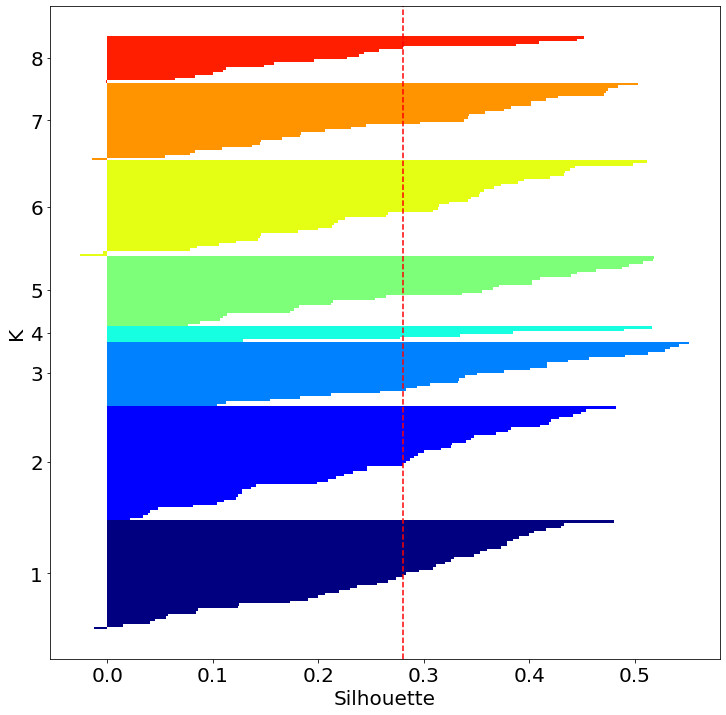

In [154]:
# 실루엣 기법
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('Silhouette')
    plt.show()

k = 8

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(result)
plotSilhouette(result, y_km)



---


# **CLUSTERING (K = 8)**

In [155]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 8
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(result)
predict = pd.DataFrame(model.predict(result))
predict.columns=['predict']

In [156]:
# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, result)))
# 컬럼명 지정
cols = ['x', 'y', 'z']
cols.insert(0,'group')
final_df.columns = cols

In [157]:
final_df

,group,x,y,z
0,2.0,-0.975254,-0.277343,2.015730
1,2.0,0.862576,-0.270488,3.210145
2,2.0,0.105251,0.822954,1.699346
3,2.0,-0.026843,0.063232,1.327696
4,2.0,-0.276204,0.494184,0.522317
5,2.0,-0.512990,0.688176,1.859676
6,1.0,0.423228,1.164896,0.534550
7,4.0,-0.547376,0.550871,0.195385
8,1.0,1.302286,1.743256,0.120159
9,4.0,-0.954328,1.113426,-0.190729


In [158]:
# 숫자 to 그룹명 변경
group_name = {0: 'red',
               1: 'orange',
               2: 'yellow',
               3: 'green',
              4: 'blue',
              5: 'navy',
              6: 'purple',
              7: 'pink'}

final_df['group'] = final_df['group'].replace(group_name)

In [159]:
feature_df = pd.DataFrame(final_df)

In [160]:
feature_df

,group,x,y,z
0,yellow,-0.975254,-0.277343,2.015730
1,yellow,0.862576,-0.270488,3.210145
2,yellow,0.105251,0.822954,1.699346
3,yellow,-0.026843,0.063232,1.327696
4,yellow,-0.276204,0.494184,0.522317
5,yellow,-0.512990,0.688176,1.859676
6,orange,0.423228,1.164896,0.534550
7,blue,-0.547376,0.550871,0.195385
8,orange,1.302286,1.743256,0.120159
9,blue,-0.954328,1.113426,-0.190729


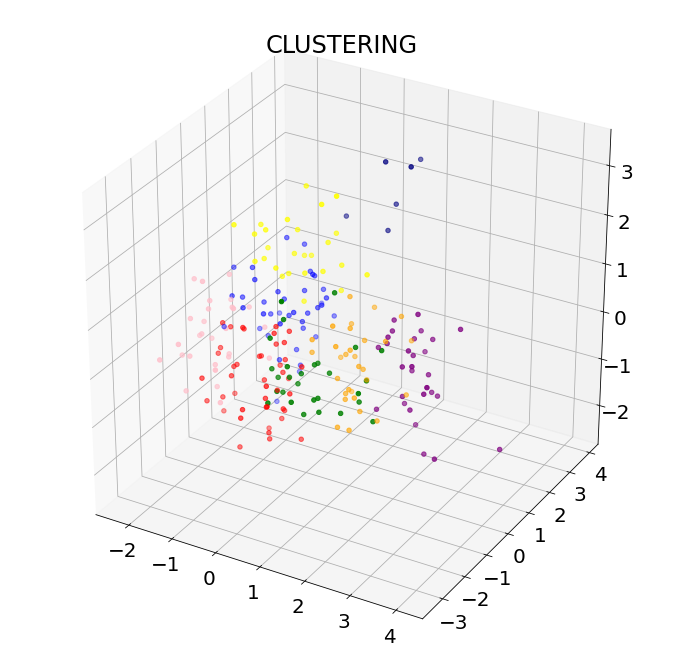

In [161]:
plt.rcParams["figure.figsize"] = (12, 12)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature_df['x'], feature_df['y'], feature_df['z'], c=final_df['group'])
plt.title('CLUSTERING')
plt.show()

In [162]:
final_df.to_excel('clustering.xlsx')